This project is about exploring the dataset whilst revising all the concepts I have learnt so far on DataCamp

In [1]:
#first, I want to import all the libraries I  think I will need / the ones I have learnt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import expon
import missingno as msno


In [2]:
#open the csvand read the first 5 rows to get an overview of the data
job_postings = pd.read_csv("job_postings.csv")
job_postings.head()

,Unnamed: 0,Job Posting ID,Job Posting Date,Job Title,Job Title Full,Job Title Additional Info,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size
0,0,2701524240,2017-01-01,Software Engineer,Software Engineer,Java Full Stack | Remote,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,NaN,NaN,NaN,6.0,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,2719108338,2017-01-01,Data Engineer,Senior Azure Data Engineer,NaN,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,NaN,NaN,NaN,1.0,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,2719503370,2017-01-01,Software Engineer,Software Engineer I,NaN,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,NaN,NaN,NaN,16.0,Paycor,Computer Software,"1,001-5,000 employees"
3,3,2734877741,2017-01-01,Business Analyst,Associate Business Analyst,Telecommute,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",NaN,NaN,NaN,1.0,Optum,Hospital & Health Care,"10,001+ employees"
4,4,2752415616,2017-01-01,Developer,Swift Developer,NaN,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",NaN,NaN,NaN,NaN,Toptal,Internet,"1,001-5,000 employees"


In [3]:
#I want to drop the first two columns and set the job posting date as the index
job_postings = job_postings.drop(['Unnamed: 0', 'Job Posting ID'], axis=1)
job_postings.set_index('Job Posting Date')
job_postings.head()

,Job Posting Date,Job Title,Job Title Full,Job Title Additional Info,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size
0,2017-01-01,Software Engineer,Software Engineer,Java Full Stack | Remote,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,NaN,NaN,NaN,6.0,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,2017-01-01,Data Engineer,Senior Azure Data Engineer,NaN,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,NaN,NaN,NaN,1.0,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2017-01-01,Software Engineer,Software Engineer I,NaN,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,NaN,NaN,NaN,16.0,Paycor,Computer Software,"1,001-5,000 employees"
3,2017-01-01,Business Analyst,Associate Business Analyst,Telecommute,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",NaN,NaN,NaN,1.0,Optum,Hospital & Health Care,"10,001+ employees"
4,2017-01-01,Developer,Swift Developer,NaN,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",NaN,NaN,NaN,NaN,Toptal,Internet,"1,001-5,000 employees"


In [4]:
#i want to see the details about each column
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25114 entries, 0 to 25113
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job Posting Date           25114 non-null  object 
 1   Job Title                  25114 non-null  object 
 2   Job Title Full             25114 non-null  object 
 3   Job Title Additional Info  8187 non-null   object 
 4   Job Position Type          25114 non-null  object 
 5   Job Position Level         25114 non-null  object 
 6   Years of Experience        25114 non-null  int64  
 7   Job Skills                 25114 non-null  object 
 8   Job Location               25114 non-null  object 
 9   Minimum Pay                1812 non-null   float64
 10  Maximum Pay                1812 non-null   float64
 11  Pay Rate                   1812 non-null   object 
 12  Number of Applicants       17529 non-null  float64
 13  Company Name               25053 non-null  obj

In [5]:
job_postings.isnull().sum() #to see how many null values I have

Job Posting Date                 0
Job Title                        0
Job Title Full                   0
Job Title Additional Info    16927
Job Position Type                0
Job Position Level               0
Years of Experience              0
Job Skills                       0
Job Location                     0
Minimum Pay                  23302
Maximum Pay                  23302
Pay Rate                     23302
Number of Applicants          7585
Company Name                    61
Company Industry               219
Company Size                   222
dtype: int64

In [6]:
#I want to get a rough idea of the shape so i see if I can remove any rows without affecting the results
job_postings.shape

(25114, 16)

In [7]:
job_postings.drop('Job Title Additional Info', axis=1)

,Job Posting Date,Job Title,Job Title Full,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size
0,2017-01-01,Software Engineer,Software Engineer,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,NaN,NaN,NaN,6.0,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,2017-01-01,Data Engineer,Senior Azure Data Engineer,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,NaN,NaN,NaN,1.0,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2017-01-01,Software Engineer,Software Engineer I,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,NaN,NaN,NaN,16.0,Paycor,Computer Software,"1,001-5,000 employees"
3,2017-01-01,Business Analyst,Associate Business Analyst,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",NaN,NaN,NaN,1.0,Optum,Hospital & Health Care,"10,001+ employees"
4,2017-01-01,Developer,Swift Developer,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",NaN,NaN,NaN,NaN,Toptal,Internet,"1,001-5,000 employees"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25109,2021-12-31,Data Scientist,Data Scientist,Full-time,Mid-Senior level,6,"['python', 'hadoop', 'r', 'powerpoint', 'progr...",United States,NaN,NaN,NaN,48.0,Venusgeo Solutions,Information Technology & Services,51-200 employees
25110,2021-12-31,Software Engineer,Software Engineer I,Full-time,Entry level,2,"['graphql', 'cloud', 'javascript', 'docker', '...",United States,NaN,NaN,NaN,17.0,Kaplan,Education Management,"10,001+ employees"
25111,2021-12-31,Software Developer,Go Software Developer,Full-time,Mid-Senior level,6,"['cloud', 'aws', 'linux', 'docker', 'go']","San Diego, CA",NaN,NaN,NaN,1.0,Jobot,Staffing & Recruiting,201-500 employees
25112,2021-12-31,Data Architect,Remote Job Opportunity: Data Architect,Contract,Entry level,2,"['excel', 'database', 'ssis', 't-sql', 'ci/cd'...","Plymouth Meeting, PA",NaN,NaN,NaN,NaN,Genzeon,Information Technology & Services,201-500 employees


<AxesSubplot:>

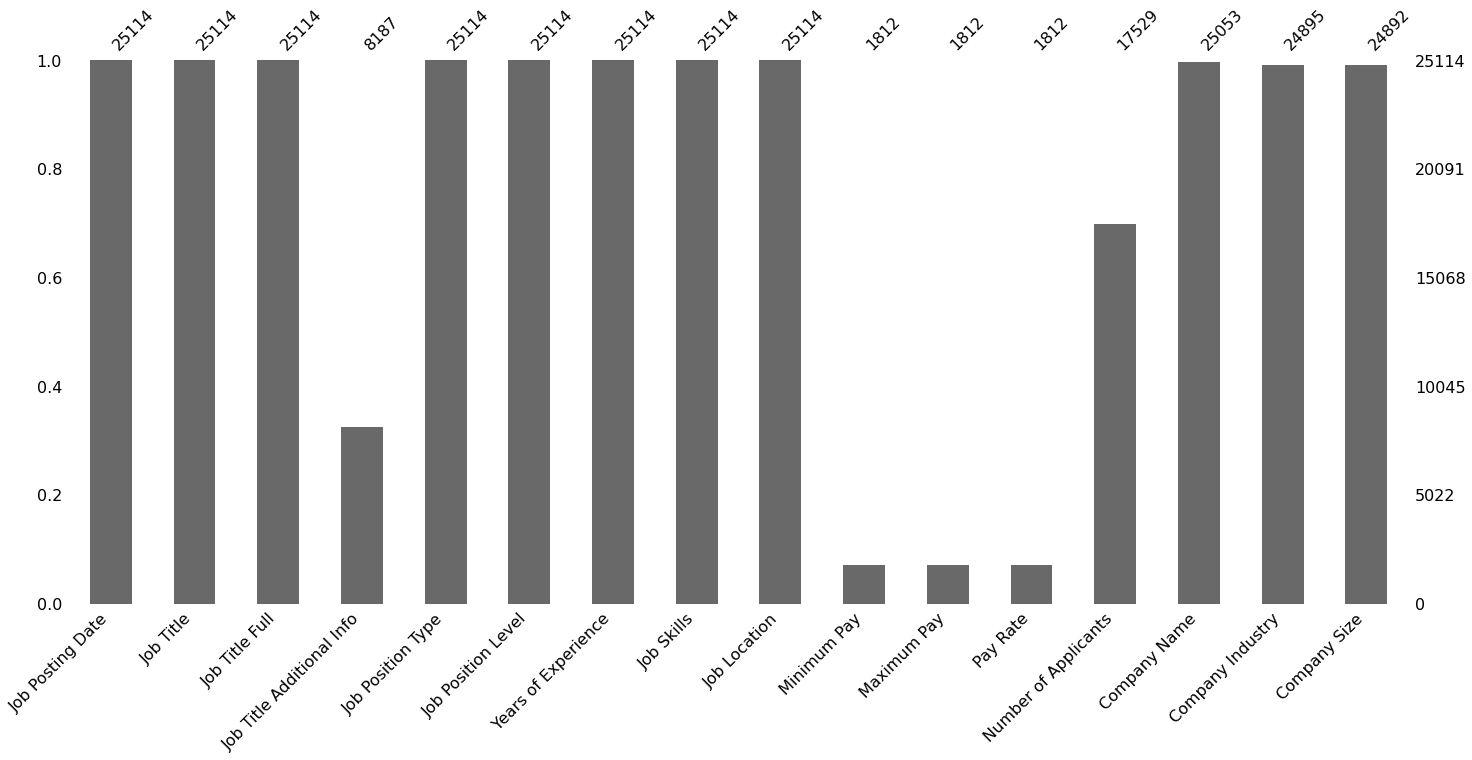

In [8]:
msno.bar(job_postings)

At this point I feel lie I will lose my mind. Basically what I wanted to do was keep the columns(Max Pay, Min Pay, and Pay rate) and visualise how many job postings often do not include these metrics. But I am struggling. I am going to keep searching until I find the solution. 

<AxesSubplot:title={'center':'Minimum Pay Report'}, xlabel='Reported?', ylabel='Number reported'>

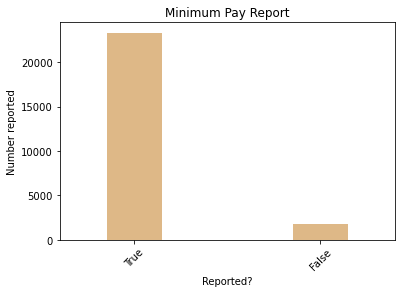

In [9]:

null_min_pay = job_postings['Minimum Pay'].isnull().value_counts().plot(kind='bar', color='Burlywood', width=0.3, rot=45, ylabel='Number reported', xlabel='Reported?', title='Minimum Pay Report')
null_min_pay

Let me just say that I am so very excited that I got this to work. I am so proud of me :)
I am making a few customizations so the bar graph above will look different from what I am seeing now. Just know that it was just black

<AxesSubplot:title={'center':'Maximum Pay Report'}, xlabel='Reported?', ylabel='Number reported'>

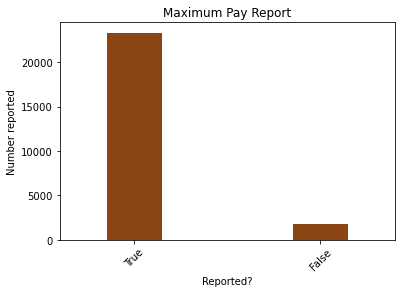

In [10]:
null_max_pay = job_postings['Maximum Pay'].isnull().value_counts().plot(kind='bar', color='SaddleBrown', width=0.3, rot=45, ylabel='Number reported', xlabel='Reported?', title='Maximum Pay Report')
null_max_pay

In [11]:
count_nan_min = len(job_postings) - job_postings['Minimum Pay'].count()
count_nan_min

23302

In [12]:
percent_missing_min = count_nan_min / len(job_postings) * 100
percent_missing_min

92.78490085211436

Approximately 93% of job postings do not have a minimum pay indicated in the job posting

In [13]:
count_nan_max = len(job_postings) - job_postings['Maximum Pay'].count()
count_nan_max

23302

In [14]:
percent_missing_max = count_nan_max / len(job_postings) * 100
percent_missing_max

92.78490085211436

Similarly, almost 93% of job postings do not have a maximum pay indicated in the job posting

In [15]:
job_postings['Job Title']

0         Software Engineer
1             Data Engineer
2         Software Engineer
3          Business Analyst
4                 Developer
                ...        
25109        Data Scientist
25110     Software Engineer
25111    Software Developer
25112        Data Architect
25113         Data Engineer
Name: Job Title, Length: 25114, dtype: object

In [16]:
job_postings['Job Title'].value_counts()

Software Engineer                  8112
Data Engineer                      3462
Business Analyst                   2009
Data Scientist                     1999
Developer                          1502
Data Analyst                       1485
Ux Researcher                       897
Software Development Engineer       506
Product Manager                     481
Senior Analyst                      463
Software Developer                  459
Systems Analyst                     416
Machine Learning Engineer           283
Financial Analyst                   237
Operations Analyst                  234
Data Architect                      215
Business Intelligence Analyst       184
Analytics Engineer                  135
User Experience Researcher          132
Product Analyst                     126
Marketing Analyst                   126
Sales Engineer                      102
Quality Assurance Analyst           101
Product Owner                       100
Business System Analyst              98


<AxesSubplot:title={'center':'Job Postings Total For Each Position for the Period'}, xlabel='Job Title', ylabel='Number of Job Postings'>

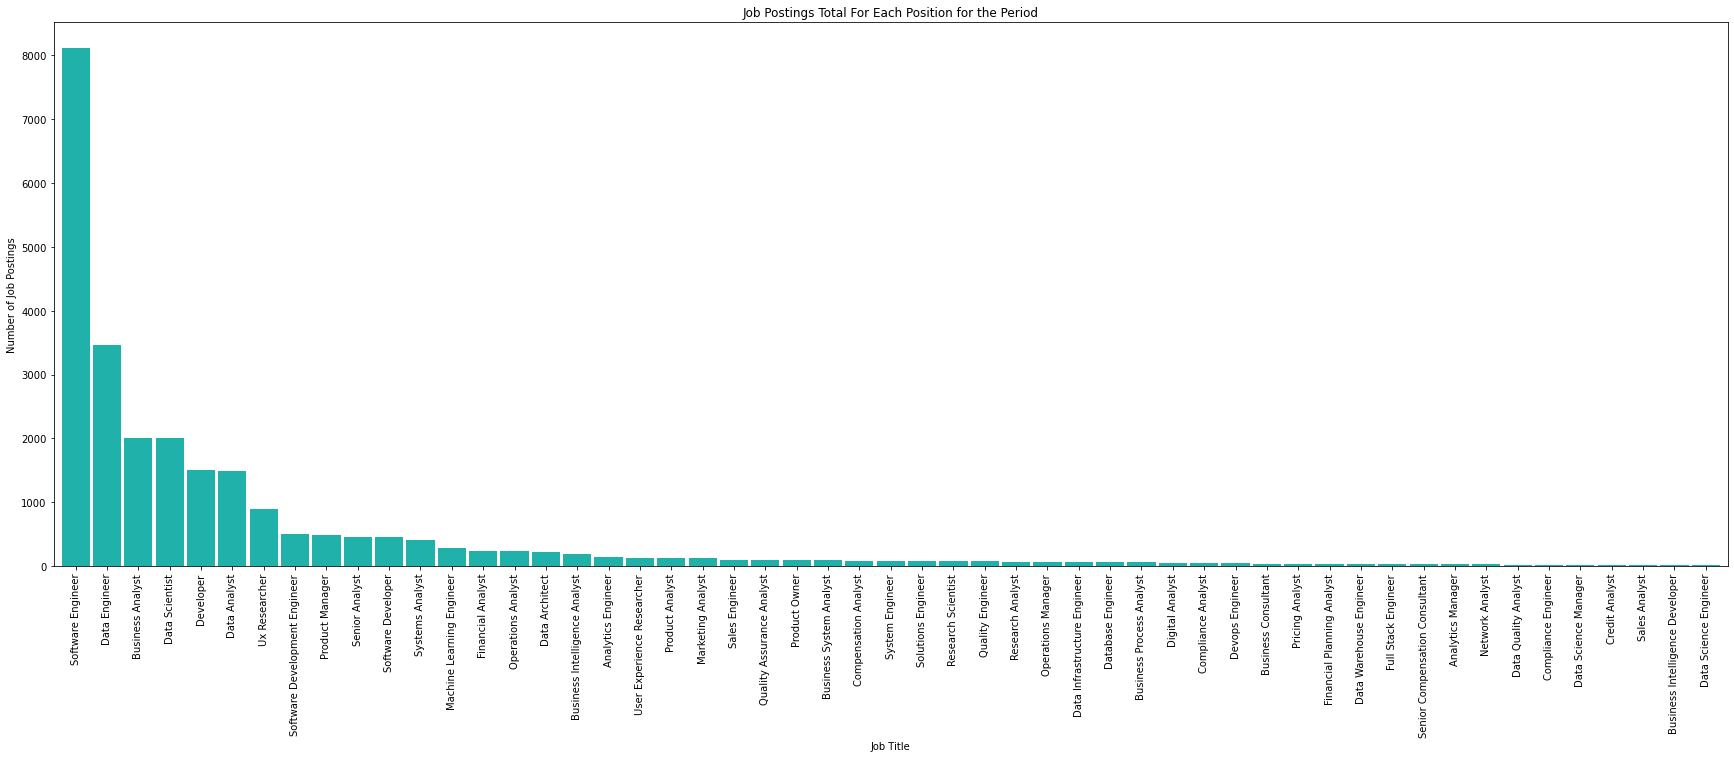

In [18]:
title_count = job_postings['Job Title'].value_counts()
plt.figure(figsize=(30, 10))
title_count.plot(kind = 'bar', color='LightSeaGreen', width = 0.9, xlabel='Job Title', ylabel='Number of Job Postings', title='Job Postings Total For Each Position for the Period')

Software Engineering had the highest job postings in the period, whilst Data Science Engineering had the least

At this point, I have not used all the libraries I loaded, however I a not going to remove them from my code because this is a lesson. I will have cases where I do not use all the libraries I learnt. But I did use most of them.